In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from fastcluster import linkage
from matplotlib.colors import ListedColormap

## Create merch dictionary to map merch number and merch name

In [2]:
merch = {}
main_data = pd.read_csv('../data/main.txt', sep="\t")
for x in range(main_data.shape[0]):
    merch[main_data.iloc[x]["商品代號"]] = main_data.iloc[x]["商品名稱"]
print(len(merch))

4535


In [3]:
whole_sales = pd.read_csv('../data/銷售數量2017_transformed.csv', sep=",")

In [4]:
data = whole_sales.to_numpy()[:,2:]

In [5]:
data_trans = data.T
print(data.shape)

(8382, 365)


In [6]:
data_length = np.sqrt(np.sum(data**2, axis=1)).reshape((8382,1))
print(data_length.shape)
data_lengths = np.dot(data_length, data_length.T)

(8382, 1)


In [7]:
vec_angles = np.dot(data,data_trans)/data_lengths

/Users/hsureggie/coding/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [8]:
print(np.where(vec_angles[5, :300]>0.8))

(array([ 4,  5, 27]),)


/Users/hsureggie/coding/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [9]:
print(vec_angles[484,513])

0.8130172247603041


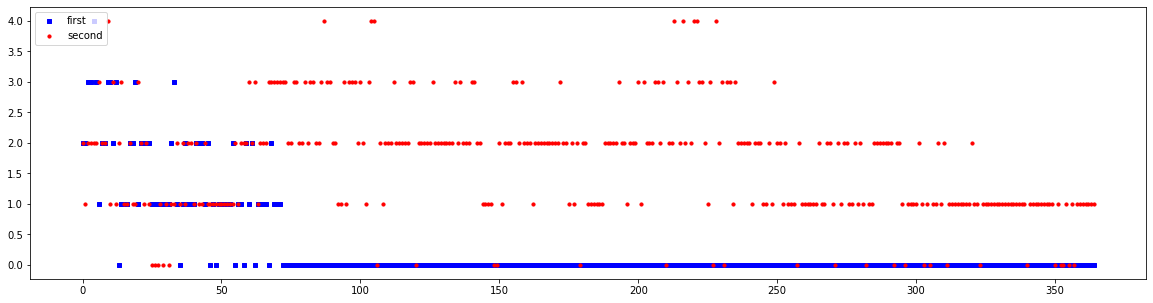

In [10]:
def plot_2vec(idx1, idx2):
    x = range(365)
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, data[idx1], s=10, c='b', marker="s", label='first')
    ax1.scatter(x, data[idx2], s=10, c='r', marker="o", label='second')
    plt.legend(loc='upper left');
    plt.show()
plot_2vec(5, 3)

In [44]:
similars = []
for i in range(data.shape[0]):
    similars.append(np.where(vec_angles[i]>0.8)[0])
print(len(similars))

8382


In [12]:
row2merch = {}
for s in similars:
    for row in s:
        row2merch[row] = merch[whole_sales.iloc[row]["商品代號"]]

In [45]:
for s in range(len(similars)):
    print(s, end=' ')
    for row in similars[s]:
        print(row, row2merch[row], end=' ')
    print('\n')

0   0 鮑菇脆筍飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 28 傳統香腸蛋飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 214 香蕉單入 479 巧克力派司 513 一配雪花蛋糕 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2084 墨西哥葡萄奶酥 2510 麥香紅茶ＴＰ３００ 3370 明太子龍蝦風味飯糰 4101 義美錫蘭紅茶 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5800 統一陽光無糖高纖豆漿 5870 麥香紅茶ＴＰ３００ 5953 麥香奶茶ＴＰ３００ 6875 香蕉單入 7414 義美錫蘭紅茶 7508 義美古早傳統無糖豆奶 7512 義美無糖黑豆奶 

1   1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 113 鮪魚雞蛋沙拉三明治 491 新感覺－花生夾心２入 538 藜麥土司 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 2105 新感覺－花生夾心２入 3347 鮪魚飯糰 5049 肉鬆飯糰 5050 鮪魚飯糰 5149 招牌火腿三明治 5482 新感覺－草莓夾心２入 6670 肉鬆飯糰 6671 鮪魚飯糰 

2   1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 113 鮪魚雞蛋沙拉三明治 491 新感覺－花生夾心２入 538 藜麥土司 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 5049 肉鬆飯糰 5050 鮪魚飯糰 5149 招牌火腿三明治 6670 肉鬆飯糰 6671 鮪魚飯糰 6852 哈密瓜（截切） 

3   3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 29 鮭魚鮭魚卵飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 114 燻火腿溏心蛋三明治 214 香蕉單入 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1691 明太子龍蝦風味飯糰 1712 肉鬆細卷 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2371 純喫茶綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2661 韋恩特濃咖啡 3081 （舊）七星１０毫克硬盒香煙 5074 明太子龍蝦風味飯糰 5096 鮪魚細卷 510

143   143 超大滿足麻醬涼麵 

144   8 鮪魚飯糰 23 五目溏心蛋飯糰 144 大滿足麻醬涼麵 

145   145 大滿足川辣涼麵 

146   146 大滿足原味麻醬涼麵 

147   147 大滿足四川香麻涼麵 

148   148 日式和醋冷麵 

149   149 韓式泡菜冷麵 

150   150 日式烏龍冷麵 

151   151 川辣雞絲涼麵 

152   152 韓式泡菜豬肉冷麵 

153   153 經典雙醬炙燒雞排鐵板麵 3585 蘿蔓凱薩沙拉 

154   154 ＸＯ醬什錦海鮮炒麵 

155   155 沙茶牛肉炒麵 

156   156 雙醬烤雞鐵板麵 

157   157 紅油抄手麵 

158   158 日式炒烏龍 

159   159 炸醬麵 

160   160 紅燒牛肉麵 

161   161 長崎野菜叉燒拉麵 

162   162 札幌味噌叉燒拉麵 

163   163 九州豚骨叉燒拉麵 292 酸菜白肉鍋 

164   164 古早味排骨酥麵 

165   165 紅燒牛肉麵 

166   166 大蒜拳骨風味拉麵 

167   167 銀次郎風味魚豚拉麵 

168   168 野菜強棒風味拉麵 

169   169 經典奶油培根義大利麵 

170   170 經典蕃茄肉醬義大利麵 

171   171 海瓜子奶油青醬義大利麵 

172   172 多重起司烤雞焗烤麵 

173   173 辣味鮮魷墨魚醬義大利麵 

174   174 義式茄汁香腸義大利麵 

175   175 特濃奶油起司培根義大利麵 

176   176 義式蘑菇奶油烤雞義大利麵 

177   177 起司奶油培根義大利麵 

178   178 狠飽香腸肉醬義大利麵 2578 冷泡茶－茶王烏龍 

179   179 夏威夷培根焗烤麵 

180   180 和風青蔥奶油鹽烤雞肉直麵 

181   181 羅馬家常燉菜蕃茄培根麵 

182   182 經典肉醬義大利麵 

183   183 狠飽臘腸肉醬義大利麵 

184   184 狠飽蘑菇奶油義大利麵 

185   185 綜合水果（截切） 

186   186 季節鮮果拼盤（截切） 

187   18

824   824 左岸咖啡館無加糖拿鐵咖啡 

825   825 特濃咖啡拿鐵 

826   826 貝納頌經典曼特寧 

827   827 貝納頌經典曼特寧深焙 

828   828 ３６法郎典藏拿堤 

829   829 貝納頌經典拿鐵 

830   830 純萃喝重焙曼特寧 

831   831 左岸咖啡館拿鐵咖啡 

832   832 ３６法郎典藏曼特寧 

833   833 純萃喝重乳拿鐵 

834   834 光泉薏仁糙米漿 

835   835 光泉鮮豆漿 1717 一配龍蝦風味沙拉手卷 

836   836 統一陽光糙米漿 

837   837 統一陽光無糖高纖豆漿 

838   51 鮪魚細卷 838 光泉米漿 

839   839 光泉燕麥高纖豆漿 

840   840 義美燕麥糙米奶 

841   841 光泉無加糖鮮豆漿 

842   842 光泉高鈣鮮豆漿減糖 

843   843 統一陽光黃金豆豆漿 

844   844 統一陽光低糖高纖豆漿 

845   845 義美糙米奶 

846   846 光泉黑芝麻鮮豆漿 

847   847 義美古早味傳統豆奶１９０ｍｌ 

848   848 光泉薏仁飲 

849   849 義美古早傳統低糖豆奶 1691 明太子龍蝦風味飯糰 5096 鮪魚細卷 7414 義美錫蘭紅茶 

850   850 義美古早傳統豆奶 

851   6 壽喜燒牛肉飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 851 義美古早傳統無糖豆奶 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 5096 鮪魚細卷 5800 統一陽光無糖高纖豆漿 7292 義美全脂鮮乳１Ｌ 7414 義美錫蘭紅茶 7492 統一陽光無糖高纖豆漿 7506 義美古早傳統低糖豆奶 7508 義美古早傳統無糖豆奶 7510 義美古早傳統無糖豆奶１Ｌ 7512 義美無糖黑豆奶 

852   852 義美古早傳統豆奶１Ｌ 

853   6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 853 義美古早傳統無糖豆奶１Ｌ 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷


1204   1204 你好水鹼性離子水 

1205   1205 ＥＶＩＡＮ天然礦泉水３３０ＭＬ 

1206   1206 舒味思氣泡水 

1207   1207 舒味思萊姆口味氣泡水 

1208   1208 Ｃｈｅｅｒｓ氣泡水 

1209   1209 多喝水ＭＯＲＥ氣泡水－檸檬 

1210   1210 京都宇治玉露深海氣泡水 

1211   1211 菠啾乳酸野草水 3066 （舊條）騎仕德藍２３支條菸 4642 （舊）七星天藍７毫克硬盒 4819 （舊）七星１０毫克軟包 

1212   1212 哈沛雅氣泡水３００ｍｌ 

1213   1213 維他命氣泡水－桃香３３０ｍｌ 

1214   1214 （舊）長壽白軟包香煙 

1215   1215 （舊）馬爾斯長支８毫克菸 

1216   1216 （舊）馬爾斯白硬盒菸 

1217   1217 （舊）尊爵Ｇ１０ 

1218   1218 （舊）尊爵Ｇ７ 

1219   1219 （舊）尊爵Ｇ９ 

1220   1220 （舊）尊爵Ｇ３ 

1221   1221 （舊）尊爵Ｇ１ 

1222   1222 （舊）長壽７毫克白軟包 

1223   1223 （舊）尊爵Ｇ６ 

1224   1224 （舊）尊爵纖細ＧＳ 

1225   1225 （舊）新樂園５號香菸 

1226   1226 （舊）尊爵白金國際包香煙 

1227   1227 （舊）玫瑰涼煙５毫克 

1228   1228 （舊）王牌經典藍６毫克香煙 

1229   1229 （舊）長壽金品７毫克香煙 

1230   1230 （舊）尊爵Ｇ２ 

1231   1231 （舊）王牌經典銀３毫克香煙 

1232   1232 （舊）王牌經典９毫克香煙 

1233   1233 （舊）新樂園１號香煙 

1234   1234 （舊）長壽白軟包３毫克香煙 

1235   1235 （舊）王牌經典１毫克香煙 

1236   1236 （舊）馬爾斯長支５毫克菸 

1237   1237 （舊）尊爵Ｇ５ 2824 （舊）長壽白軟包３毫克香煙 3724 關西仙草湯 6880 有機紅莧菜 

1238   1238 （舊）馬爾斯長支２毫克菸 

1239   1239 （舊）維斯塔７毫克香菸 


1666   1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 2105 新感覺－花生夾心２入 5049 肉鬆飯糰 5050 鮪魚飯糰 5149 招牌火腿三明治 6670 肉鬆飯糰 6671 鮪魚飯糰 

1667   1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 113 鮪魚雞蛋沙拉三明治 491 新感覺－花生夾心２入 538 藜麥土司 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 2105 新感覺－花生夾心２入 3347 鮪魚飯糰 5049 肉鬆飯糰 5050 鮪魚飯糰 6670 肉鬆飯糰 6671 鮪魚飯糰 

1668   1668 炭火烤雞飯糰 

1669   4 花月嵐－拳骨叉燒飯糰 5 花月嵐－咖哩叉燒炒飯飯糰 27 招牌紫米飯糰 1669 花月嵐－拳骨叉燒飯糰 

1670   1670 花月嵐－咖哩叉燒炒飯飯糰 

1671   6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 1671 壽喜燒牛肉飯糰 1691 明太子龍蝦風味飯糰 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 

1672   7 肉鬆飯糰 8 鮪魚飯糰 23 五目溏心蛋飯糰 115 雞蛋沙拉三明治 120 招牌火腿三明治 880 義美奶茶 1672 肉鬆飯糰 1673 鮪魚飯糰 1688 五目溏心蛋飯糰 1717 一配龍蝦風味沙拉手卷 1778 招牌火腿三明治 2106 全家花生夾心土司（２入） 2477 義美奶茶 3353 鮪魚飯糰 4225 義美奶茶 5055 肉鬆飯糰 5056 鮪魚飯糰 5717 樂多綠茶 6676 肉鬆飯糰 6677 鮪魚飯糰 7534 義美奶茶 

1673   7 肉鬆飯糰 8 鮪魚飯糰 23 五目溏心蛋飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 58 一配海陸雙手卷 115 雞蛋沙拉三明治 120 招牌火腿三明治 264 溏心蛋洋芋沙拉 492 全家花生夾心土司（２入） 880 義美奶茶 1203 味丹多喝水 1672 肉鬆飯糰 1673 鮪魚飯糰 1688 五目溏心蛋飯糰 1717 一配龍蝦風味沙拉手卷 1718 一配海陸雙手卷 1778 招牌火腿三明治 1779 鮪魚雞蛋沙拉三明治 

1778   7 肉鬆飯糰 8 鮪魚飯糰 23 五目溏心蛋飯糰 120 招牌火腿三明治 1672 肉鬆飯糰 1673 鮪魚飯糰 1688 五目溏心蛋飯糰 1717 一配龍蝦風味沙拉手卷 1778 招牌火腿三明治 1779 鮪魚雞蛋沙拉三明治 2106 全家花生夾心土司（２入） 3353 鮪魚飯糰 5055 肉鬆飯糰 5056 鮪魚飯糰 5159 招牌火腿三明治 6676 肉鬆飯糰 6677 鮪魚飯糰 7534 義美奶茶 

1779   8 鮪魚飯糰 1673 鮪魚飯糰 1778 招牌火腿三明治 1779 鮪魚雞蛋沙拉三明治 5055 肉鬆飯糰 5056 鮪魚飯糰 

1780   1780 青蔬火腿起司三明治 

1781   123 醬燒雞肉三明治 1781 醬燒雞肉三明治 

1782   1782 繽紛水果三明治 

1783   1783 招牌起司三明治 

1784   24 一配鹽蔥燒肉飯糰 126 厚切豬排蛋三明治 1689 一配鹽蔥燒肉飯糰 1784 厚切豬排蛋三明治 5072 一配鹽蔥燒肉飯糰 

1785   127 焗烤鮪魚歐姆蛋三明治 1785 焗烤鮪魚歐姆蛋三明治 

1786   22 炙燒培根卷飯糰 81 老薑麻油雞肉燴飯 102 皮蛋瘦肉煲粥 128 茄汁薯餅三明治 271 蘿蔓凱薩沙拉 1687 炙燒培根卷飯糰 1760 皮蛋瘦肉煲粥 1786 茄汁薯餅三明治 5070 炙燒培根卷飯糰 5474 義式起司半月餃 6691 炙燒培根卷飯糰 7030 濃黑巧克力起司 7172 巧克力雙重奏鬆餅 

1787   1787 咖哩雞起司捲餅（北區．中區） 

1788   1788 牛肉起司可頌（北．中區） 

1789   1789 多重起司火腿捲 

1790   1790 雙層牛肉起司堡 

1791   1791 德式燻腸肉醬捲 

1792   1792 蜂蜜芥末雞腿堡 

1793   1793 花生醬牛肉培根堡 

1794   1794 里肌起司可頌（北．中區） 

1795   1795 黃金雞腿堡 

1796   1719 超人氣雙手卷 1796 豬肉蛋堡 5953 麥香奶茶ＴＰ３００ 

1797   1797 泰式椒麻雞涼麵 

1798   1798 一番涼麵 

1799   1799 日式鰹露蕎麥風味涼麵 

2204   2204 藥膳排骨隨意杯 

2205   2205 輕鬆生活素三杯炒飯 

2206   2206 桂冠起司海鮮飯 

2207   2207 台灣甘梅薯條 

2208   2208 蒜香綜合滷味 

2209   2209 醬滷香雞三寶 

2210   2210 麻油雞隨意杯 

2211   2211 羊肉爐隨意杯 

2212   2212 經典鍋貼（７入） 

2213   2213 一口爆漿餡餅（５入） 

2214   2214 美式田園薯條 

2215   2215 黃金酷辣雞腿排 

2216   2216 起司香雞塊 

2217   584 抹茶湯圓 612 凍豆腐 2217 花生湯圓 2226 桂冠燕餃 6636 金色三麥草莓啤酒（瓶） 8343 金色三麥草莓啤酒（瓶） 

2218   2196 鮮肉湯圓 2218 芝麻湯圓 

2219   2219 瑞典肉丸 

2220   2220 香烤三角骨 

2221   2221 糖醋排骨 

2222   2222 三杯雞 

2223   2223 總匯披薩 

2224   2224 紐澳良香草烤半雞 

2225   2225 和風薑汁燒豚米漢堡 

2226   584 抹茶湯圓 612 凍豆腐 2203 桂冠魚餃 2217 花生湯圓 2226 桂冠燕餃 5593 花生湯圓 6636 金色三麥草莓啤酒（瓶） 8343 金色三麥草莓啤酒（瓶） 

2227   2227 桂冠蝦餃 

2228   1142 （會員）黃色跑車行李箱 2228 乳酪蘑菇筆尖麵 

2229   2229 奶香蒔蔬寬扁麵 

2230   2230 輕鬆生活蕃茄肉醬義大利麵 

2231   2231 輕鬆生活奶油培根義大利麵 

2232   2232 醡醬拌麵（素） 

2233   2233 紅龍雞肉捲 

2234   2234 好市多黑胡椒牛肉捲 

2235   573 雅方酸菜白肉鍋 2235 台糖白玉五花肉片 3516 夏威夷培根焗烤麵 5238 椪柑（冷藏原果－袋） 

2236   2236 雪花豬肉片 2990 威仕２１－冰急綠２１支 4490 （會員）衝浪板合金迴力車白 4491 （會員）衝浪板合金迴力車黃 6034 每朝健康爽酷飲料 8204 （舊）登喜路薄荷

2669   2669 ＶＩＶＩＴＳ日本的蘋果氣泡飲 

2670   2670 舒味思蜜桃口味輕氣泡飲 

2671   2671 可口可樂汽水４３５ｍｌ 

2672   2672 黑松沙士２Ｌ 

2673   2673 蘋果西打２Ｌ 

2674   2674 可口可樂２Ｌ 

2675   2675 黑松沙士 

2676   2676 可口可樂ＰＥＴ 

2677   2677 雪碧汽水 

2678   2678 ＶＩＶＩＴＳ京柚ｍｉｘ蘇打 

2679   2679 薑味可口可樂 7141 北海道白醬起司小土司 

2680   2680 雪碧汽水沁爽檸檬 

2681   2681 全家開運福袋２０１７ 4348 立頓奶茶ＴＰ（廢資源兌換用） 

2682   2682 三矢蘇打 

2683   2683 三矢蘇打愛媛清見蜜柑 

2684   2684 芬達汽水橘子口味 

2685   2685 Ｖｉｖｉｔｓ沖繩鳳梨氣泡飲 

2686   2686 加鹽黑松沙士 

2687   2687 蘋果西打 

2688   2688 奧利多水碳酸飲料 

2689   2689 Ｌｅｍｏｎ＋Ｃ氣泡飲檸檬口味 

2690   2690 每朝健康爽酷飲料５９０ｍｌ 

2691   2691 維大力汽水 

2692   2692 黑松沙士清爽ｄｅｒ 

2693   2693 Ｈｉ－ｐｌｕｓ（冰果鮮橙） 

2694   2694 芬達汽水鳳梨口味 

2695   2695 雪碧３５０ｍｌ 

2696   2696 可樂ＺｅｒｏＰＥＴ 

2697   2697 百事可樂 

2698   2698 可口可樂３５０ｍｌ 

2699   2699 可爾必思水語３３０ｍｌ 

2700   2700 巧克力牛乳（保久乳） 

2701   2701 可爾必思葡萄乳酸菌飲料 

2702   2702 萬丹紅紅豆水 

2703   2703 愛健黑豆水 

2704   2704 （選）泰山八寶粥 

2705   2705 （選）愛之味牛奶花生 

2706   2614 光泉茉莉蜜茶 2706 泰山八寶粥（６入） 

2707   2707 光泉米漿（罐裝） 

2708   2708 光泉鮮豆漿（罐裝） 

2709   2709 愛之味

2952   2952 佳士達７毫克香菸 6389 萬寶路金軟包活性碳濾嘴香菸 

2953   2953 佳士達５毫克香菸 

2954   2954 卡莫藍晶球香菸 

2955   2955 七星４風味晶球香菸 

2956   2956 佳士達１毫克香菸 

2957   2957 樂迪２５－藍 

2958   2958 雲摩爾ＸＳ紫旋風 

2959   2959 雲絲頓２２藍 

2960   2960 倫敦登喜路６毫克香煙 

2961   2961 倫敦登喜路１毫克香煙 

2962   2962 五五五香煙７毫克 

2963   2963 倫敦登喜路３毫克香煙 

2964   2964 皇家寶馬隨選風味香菸１號 

2965   2965 皇家寶馬隨選風味香菸７號 

2966   2966 倫敦登喜路精裁１毫克香煙 

2967   2967 倫敦登喜路精裁４毫克香菸 

2968   2968 倫敦登喜路精裁７毫克香菸 

2969   2969 皇家寶馬隨選風味香菸４號 

2970   2970 倫敦登喜路隨選風味香菸３號 

2971   2971 鴻運香菸－ＬＵＣＫＹ７號 

2972   2972 登喜路精裁濃縮香菸１毫克 

2973   2973 鴻運香菸ＬＵＣＫＹ４號 

2974   2974 鴻運雙晶球薄荷香菸紫Ｘ綠 4712 皇家寶馬隨選風味香菸７號 8004 雲摩爾ＸＳ香菸－藍 

2975   2975 寶馬長支香菸７毫克 

2976   2976 寶馬長支香菸４毫克 

2977   2977 日本肯特ＳＳ１號 

2978   1535 萬寶路紫風味雙晶球薄荷香菸 2978 日本肯特長支香菸６號 3302 沛羅尼啤酒聖誕節４入組 3613 古早味滷排骨 4620 馬爾斯ＭＸ 

2979   127 焗烤鮪魚歐姆蛋三明治 860 光泉無加糖黑豆漿 1703 大口法香烤雞飯糰 2979 金裝大衛杜夫７毫克香煙 

2980   2980 纖秀大衛７毫克香煙 

2981   41 大口法香烤雞飯糰 45 大口奶油蕈菇起司雞排飯糰 2981 寶仕２１－藍２１支 3720 伯爵巧克力餅乾泡芙 7051 伯爵巧克力餅乾泡芙 

2982   2982 天藍大衛３毫克香煙 

2983   2983 寶仕２１－銀２１

3315   3315 金色三麥星塵巧克力啤酒 3316 金色三麥暗黑蜂蜜啤酒 5019 金色三麥星塵巧克力啤酒 

3316   3315 金色三麥星塵巧克力啤酒 3316 金色三麥暗黑蜂蜜啤酒 5019 金色三麥星塵巧克力啤酒 

3317   3317 海尼根啤酒—瓶 

3318   3318 可樂娜啤酒 

3319   3319 調情聖手特濃蜂蜜檸檬 

3320   3320 ＣＨＯＹＡ蝶矢氣泡梅酒 

3321   3321 微醉葡萄沙瓦雞尾酒 

3322   3322 微醉冰涼鳳梨 

3323   3323 ＡＳＡＨＩ鮮摘果實　沖繩香檬 

3324   3324 夏日蜜蘋果酒－接骨木萊姆 

3325   3325 －１９６秋收蘋果 

3326   3326 調情聖手聖誕限定綜合莓果氣泡 

3327   3327 調情聖手聖誕限定綜合葡桃氣泡 3541 老欉柳丁２入（冷藏原果－袋） 5248 雪白菇 5285 雞肉野菜豆乳鍋 7247 總匯披薩 

3328   3328 調情聖手特濃蜂蜜柚子蜜柑 

3329   3329 微醉白色沙瓦哈蜜瓜口味 

3330   3330 ＫＩＲＩＮ本搾－溫州蜜柑 

3331   3331 －１９６雞尾酒＜櫻花櫻桃＞ 

3332   3332 ＡＳＡＨＩ鮮摘果實現榨葡萄 

3333   3333 微醉彈珠汽水 

3334   3334 ＡＳＡＨＩ　鮮摘果實　黃金鳳梨 

3335   3335 ＡＳＡＨＩ果實瞬間安地斯哈密瓜 

3336   3336 思美洛ＩＣＥ青蘋果 

3337   3337 莎瓦納頂級蘋果酒 

3338   3338 微醉黑醋栗柳橙 

3339   3339 金賓ＨＩＧＨＢＡＬＬ 

3340   3340 調情聖手雞尾酒　萬聖節粉紅 

3341   3341 微醉雞尾酒－梅酒沙瓦 

3342   3342 鮮摘果實　紅蘋果 

3343   3343 調情聖手聖誕限定葡萄 3344 調情聖手聖誕限定黑醋栗 

3344   3343 調情聖手聖誕限定葡萄 3344 調情聖手聖誕限定黑醋栗 

3345   2201 鹽烤鯖魚 2725 （預）戽斗星球公仔磁鐵（藍色款） 3055 愛喜香菸５毫克 3275 百威啤酒　皇者慶典瓶 3345 白鶴香甜果凍　氣泡酒組

3746   3746 全家可可好棒棒 

3747   3747 蛋黃奶香麵包 

3748   3748 法式糖霜布里歐 

3749   3749 全家紅豆麵包 

3750   3750 蛋黃奶香麵包 

3751   3751 特濃奶香麵包 

3752   3752 北海道煉乳棒 

3753   3753 日曬海鹽羅宋 

3754   3754 墨西哥巧克力麵包 

3755   3755 香蕉巧克力雙餡夾心麵包 

3756   3756 香蒜奶油羅宋 

3757   3757 大甲芋泥麵包 

3758   3758 全家草莓戀奶夾心麵包 

3759   3759 菠蘿麵包 

3760   3760 花生法式夾心 

3761   3761 全家克林姆麵包 

3762   3762 墨西哥鹹奶油麵包 

3763   3763 全家熱狗麵包 

3764   3764 一配菠蘿麵包 

3765   3765 紅豆克林姆麵包 

3766   3766 阿華田脆酷夾心麵包 

3767   3767 巧克力巨蛋麵包 

3768   91 超濃起司豬排焗飯 420 珍珠地瓜圓燒仙草 1750 超濃起司豬排焗飯 2082 椰香奶酥麵包 2725 （預）戽斗星球公仔磁鐵（藍色款） 3429 超濃起司豬排焗飯 3727 珍珠地瓜圓燒仙草 3768 椰香奶酥麵包 5413 珍珠地瓜圓燒仙草 7533 午后時光重乳奶茶 

3769   3769 奶酥麵包 

3770   3770 墨西哥葡萄奶酥 

3771   3771 一配維也納牛奶軟法 

3772   3772 起司火腿貝果 

3773   3773 Ｂｉｇ墨西哥巧酥麵包 

3774   3774 牛奶核桃麵包 

3775   3775 熱狗麵包 

3776   3776 藍莓寒天貝果 

3777   3777 一配切達起司貝果 

3778   3778 一配Ｂｉｇ巨蛋牛奶麵包 

3779   3779 一配菠蘿可頌 

3780   1697 柚香珠貝飯糰 3780 百香杏仁糖霜可頌 

3781   3781 起酥葡萄奶酥 

3782   3782 全家起酥葡萄奶酥 

3783   3783 一配肉鬆起酥麵包 

3784   3784 巧克力派司 

3785 

4125   3023 （舊）利群新版８香菸 4125 果汁時刻檸檬纖果汁 4805 （舊條）嵐閣７毫克條菸 5558 日式小火鍋 5587 桂冠蛋餃 5602 桂冠蝦餃 5603 桂冠蟳味棒 6977 鮮切培根 

4126   2295 桂格燕麥堅果王 4126 葡萄莓果綜合果汁 5249 黃金蜜玉米 5658 哈密瓜牛奶 6919 沙茶豬肉鍋 

4127   4127 鮮榨西瓜汁 

4128   4128 優鮮沛蔓越莓綜合果汁飲料經典 

4129   4129 １００％綜合果汁（含花青素） 

4130   4130 葡萄草莓綜合果汁 

4131   4131 可果美鳳梨綜合果汁 

4132   4132 可果美番茄蘋果汁 

4133   4133 一日蔬果１００％蕃茄甘蔗汁 

4134   4134 義美酸梅湯 

4135   4135 義美酸梅湯１０００ｍｌ 

4136   4136 農搾檸檬飲 

4137   4137 芒果白桃綜合果汁 

4138   4138 波蜜檸檬綜合果汁飲料（醋添加） 

4139   4139 果汁時刻鮮摘柳橙綜合果汁 

4140   4140 愛之味梅子蕃茄綜合果蔬汁 

4141   4141 波蜜果菜汁 

4142   4142 波蜜芭樂汁 

4143   4143 波蜜蘋果綜合果汁飲料（醋添加） 

4144   4144 果汁時刻鮮摘葡萄綜合果汁 

4145   4145 津津蘆筍汁 

4146   4146 每日Ｃ１００％柳橙汁 

4147   4147 胡蘿蔔綜合蔬果汁 

4148   4148 鮮榨椪柑原汁 

4149   4149 波蜜一日蔬果１００％紫色蔬果汁 

4150   4150 波蜜一日蔬果１００％蔬果汁 

4151   4151 左岸咖啡館昂列咖啡 

4152   4152 貝納頌館藏拿鐵 

4153   4153 咖啡拿鐵 

4154   4154 貝納頌館藏曼特寧 

4155   4155 貝納頌經典曼特寧（２入） 

4156   4156 純萃喝超研磨黑萃咖啡 

4157   4157 貝納頌經典榛果風味拿鐵 

4158   4158 純萃喝超研磨炭燒咖啡 

4159   4159 純萃喝炭焙咖啡 

4160   4160 貝納頌經

4512   4512 舒跑運動飲料１．５Ｌ 

4513   4513 舒跑運動飲料ＰＥＴ 

4514   4514 寶礦力水得 

4515   4515 舒跑１００　Ｌｉｇｈｔ補給飲料 

4516   4516 ＩＯＮ　ＷＡＴＥＲ（低卡） 

4517   1172 運動飲料 4517 運動飲料 6110 運動飲料 

4518   4518 寶礦力水得９００ｍｌ 

4519   4519 熊霸激能飲料 

4520   4520 寶礦力水得玻璃水瓶 

4521   4521 舒跑運動飲料９７５ｍｌ 

4522   4522 舒跑鹼性離子水８５０ｍｌ 7841 舒跑鹼性離子水８５０ｍｌ 

4523   4523 味丹多喝水 

4524   4524 天然水（活動用） 

4525   4525 天然水 

4526   51 鮪魚細卷 1691 明太子龍蝦風味飯糰 1717 一配龍蝦風味沙拉手卷 4526 天然水２．２Ｌ 5096 鮪魚細卷 

4527   4527 鹼性離子水 

4528   4528 （選）悅氏礦泉水２．２Ｌ 

4529   4529 （選）悅氏６Ｌ礦泉水 

4530   3088 （舊條）七星國際包條煙 4530 法國ＥＶＩＡＮ天然礦泉水ＰＥＴ 8259 台灣生啤酒１８天罐裝（６入） 

4531   4531 鹼性離子水１３８５ＭＬ 

4532   4532 天然熔岩氣泡水－檸檬 

4533   4533 天然熔岩礦泉水 

4534   4534 （選）味丹多喝水５．８Ｌ 

4535   4535 富維克礦泉水 

4536   4536 多喝水２Ｌ 

4537   1194 形動海洋深層水 4537 形動海洋深層水 6133 形動海洋深層水 

4538   4538 味丹竹炭水 7577 生活泡沫紅茶 

4539   4539 台鹽海洋鹼性離子水 

4540   4540 統一ＰＨ９鹼性離子水 

4541   4541 ＵＮＩ　ＷＡＴＥＲ純水 

4542   4542 悅氏Ｌｉｇｈｔ鹼性水 

4543   4543 泰山純水 

4544   2890 （舊條）倫敦登喜路１毫克條煙 4544 富維克礦泉水運動瓶 5018 金色三麥百香冰果室 6431 （舊）寶仕２１－紅２１支 

4545 

4839   4839 （舊）樂邁紅長支２０支濾嘴香菸 

4840   4840 （舊）萬寶路軟包活性碳濾嘴香菸 

4841   4841 （舊）嵐閣１０毫克活性碳濾嘴香菸 

4842   4842 （舊）大衛杜夫醇萃香煙（勁黑） 

4843   4843 （舊）樂迪２５－紅 

4844   4844 七星香菸２４支 

4845   4845 峰硬盒香煙 6276 雲絲頓藍７毫克香煙 

4846   11 傳統十六穀米燻雞飯糰 31 一配北海道秋鮭飯糰 2843 尊爵白金Ｇ６ 2875 長壽黃硬盒香煙 2935 七星天藍７毫克硬盒 3119 七星１０毫克硬盒香煙 4596 尊爵白金Ｇ１０ 4600 尊爵Ｇ１ 4602 尊爵白金Ｇ６ 4604 新樂園５號香菸 4631 長壽黃硬盒香煙 4683 七星天藍７毫克硬盒 4712 皇家寶馬隨選風味香菸７號 4846 七星１０毫克硬盒香煙 6191 尊爵Ｇ１ 6193 尊爵白金Ｇ６ 6196 尊爵白金國際包香煙 6199 尊爵白金Ｇ２ 6271 七星天藍７毫克硬盒 6275 雲絲頓紅１０毫克香煙 6276 雲絲頓藍７毫克香煙 6449 七星１０毫克硬盒香煙 6450 七星１０毫克軟包 8165 七星１０毫克硬盒香煙 8239 樂邁紫風味晶球香菸 

4847   4847 七星１０毫克軟包 

4848   4848 七星１０毫克國際包 

4849   3544 樂淇蘋果２入（北區） 3898 炸芋頭 4849 雲摩爾ＸＳ香菸－紅 

4850   4850 黑峰１０毫克香煙 5307 古早味滷排骨 7060 珍珠地瓜圓燒仙草 

4851   4851 七星特仕１０毫克香煙 

4852   4852 雲摩爾ＸＳ長支－紅香菸 

4853   1676 傳統十六穀米燻雞飯糰 4853 七星酷黑１０毫克香煙 6276 雲絲頓藍７毫克香煙 

4854   4854 峰藍香菸２０支 

4855   4855 卡莫晶球香菸 

4856   4856 樂迪２５－紅 

4857   4857 雲絲頓２２紅 

4858   4858 五五五香煙１０毫克 

4859   4859 皇家寶馬隨選風味香菸９號 

4860   3961 大比目魚輪切片（扁鱈） 4860 倫敦登喜路１０毫克香煙 

4861   48

5100   0 鮑菇脆筍飯糰 3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 214 香蕉單入 513 一配雪花蛋糕 853 義美古早傳統無糖豆奶１Ｌ 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 1772 燻火腿溏心蛋三明治 2084 墨西哥葡萄奶酥 2371 純喫茶綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2543 茶裏王日式綠茶 2588 麥香奶茶ＴＰ３００ 2644 伯朗咖啡 2661 韋恩特濃咖啡 4101 義美錫蘭紅茶 4257 麥香紅茶ＴＰ３００ 4346 麥香奶茶ＴＰ３００ 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5715 純喫茶紅茶 5800 統一陽光無糖高纖豆漿 5870 麥香紅茶ＴＰ３００ 5901 茶裏王日式綠茶 5926 麥香綠茶ＴＰ３００ 5953 麥香奶茶ＴＰ３００ 7292 義美全脂鮮乳１Ｌ 7414 義美錫蘭紅茶 7506 義美古早傳統低糖豆奶 7508 義美古早傳統無糖豆奶 7655 麥香奶茶ＴＰ３００ 

5101   5101 韓式燒肉手卷 

5102   58 一配海陸雙手卷 1718 一配海陸雙手卷 5102 一配海陸雙手卷 

5103   5103 超人氣雙手卷 

5104   5104 日式蒜香燒豚飯 

5105   5105 大碗雞肉飯 

5106   5106 招牌腿排便當（南區限定） 

5107   5107 招牌雞腿便當（南區限定） 

5108   5108 狠飽雞排蒜香炒飯 

5109   5109 花月嵐鐵板咖哩炒飯 

5110   5110 香腸炒飯 

5111   5111 鐵板奶油蒜香炒飯 

5112   5112 麻婆豆腐燴飯 

5113   5113 狠飽戰斧雞腿炒飯 

5114   5114 紅燒牛肉燴飯 

5115   5115 傳香大雞腿櫻花蝦油飯 

5116   5116 香滷雞腿木桶油飯 

5117   5117 蔥爆牛肉燴飯 

5118   5118 滑蛋牛肉燴飯 

5119   5119 老薑麻油雞肉燴

5450   5450 一配菠蘿麵包 

5451   5451 紅豆克林姆麵包 

5452   5452 阿華田脆酷夾心麵包 

5453   5453 巧克力巨蛋麵包 

5454   91 超濃起司豬排焗飯 460 椰香奶酥麵包 2082 椰香奶酥麵包 3429 超濃起司豬排焗飯 5454 椰香奶酥麵包 6756 超濃起司豬排焗飯 7060 珍珠地瓜圓燒仙草 

5455   5455 奶酥麵包 

5456   5456 墨西哥葡萄奶酥 

5457   236 黃金蜜玉米 5384 原味波士頓派 5457 一配維也納牛奶軟法 

5458   5458 起司火腿貝果 

5459   5459 Ｂｉｇ墨西哥巧酥麵包 

5460   5460 牛奶核桃麵包 

5461   5461 熱狗麵包 

5462   1159 紅牛蔓越莓風味能量飲料 5462 藍莓寒天貝果 6883 黃金蜜玉米 

5463   5463 一配切達起司貝果 

5464   5464 一配Ｂｉｇ巨蛋牛奶麵包 

5465   5465 一配菠蘿可頌 

5466   5466 百香杏仁糖霜可頌 

5467   5467 起酥葡萄奶酥 

5468   5468 全家起酥葡萄奶酥 

5469   5469 一配肉鬆起酥麵包 

5470   5470 巧克力派司 

5471   5471 烤富士蘋果派 

5472   5472 青蔥起司麵包 

5473   5473 帕瑪森起司火腿麵包 

5474   22 炙燒培根卷飯糰 81 老薑麻油雞肉燴飯 128 茄汁薯餅三明治 300 古早味滷排骨 483 義式起司半月餃 1687 炙燒培根卷飯糰 1740 老薑麻油雞肉燴飯 1760 皮蛋瘦肉煲粥 1786 茄汁薯餅三明治 2102 義式起司半月餃 5120 老薑麻油雞肉燴飯 5434 法式糖霜布里歐 5474 義式起司半月餃 7030 濃黑巧克力起司 7807 能量果茶－蜜桃紅玉 

5475   5475 香蔥麵包 

5476   5476 海苔肉鬆沙拉麵包 

5477   5477 比利時列日鬆餅 

5478   5478 布朗尼鬆餅 

5479   5479 核桃布朗尼鬆餅 

5480   5049 肉鬆飯糰 5050 鮪魚飯糰 5480 新感覺－花生夾

5843   5843 阿薩姆奶茶 

5844   5844 午后時光皇家伯爵奶茶 

5845   5845 午后時光王室大吉嶺奶茶 

5846   5846 立頓原味奶茶 

5847   5847 立頓巧克力奶茶 

5848   5848 飲冰室茶集紅奶茶 

5849   5849 飲冰室茶集烏龍奶茶 

5850   5850 星巴克紅茶那堤星冰樂 

5851   5851 美粒果１００％柳橙汁 

5852   5852 星巴克焦糖星冰樂咖啡飲料 

5853   5853 小小兵蘋果草莓果汁 

5854   5854 卡爾款小小兵隨身瓶 

5855   5855 戴夫款小小兵隨身瓶 

5856   5856 凱文款小小兵隨身瓶 

5857   5857 午后時光皇家伯爵奶茶 

5858   5858 ３點１刻原味紅烏龍奶茶 

5859   5859 ３點１刻黑糖紅烏龍奶茶 

5860   5860 愛之味分解茶３５０ｍｌ 

5861   5861 （選）星巴克咖啡星冰樂咖啡飲料 

5862   5862 （選）星巴克摩卡星冰樂咖啡飲料 

5863   5863 雙健茶王３５０ｍｌ 

5864   5864 鮮採蕃茄汁ＯＬＩＧＯ３５０ｇ 

5865   5865 一日水果１００％蘋果汁 

5866   5866 一日蔬果１００％紫色蔬果汁 

5867   5867 午后時光英式金麥奶茶 

5868   5868 麥香紅茶ＴＰ３７５ 

5869   5869 御茶園特上檸檬茶 

5870   0 鮑菇脆筍飯糰 3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 114 燻火腿溏心蛋三明治 214 香蕉單入 462 墨西哥葡萄奶酥 479 巧克力派司 513 一配雪花蛋糕 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1196 台鹽海洋鹼性離子水 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 1864 香蕉單入 2084 墨西哥葡萄奶酥 2370 純喫茶紅茶６５０ｍｌ 2371 純喫茶綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2543 茶裏王日式綠茶 2563 麥香綠茶ＴＰ３００ 2588 麥香奶茶ＴＰ３００

6169   6169 （舊）長壽金品７毫克香煙 

6170   3081 （舊）七星１０毫克硬盒香煙 4568 （舊）尊爵Ｇ１ 4625 （舊）長壽黃硬盒香煙 6170 （舊）尊爵Ｇ２ 

6171   6171 （舊）王牌經典銀３毫克香煙 

6172   4475 兔丸多功能萬用枕－灑花款 6172 （舊）王牌經典９毫克香煙 

6173   6173 （舊）新樂園１號香煙 

6174   6174 （舊）長壽白軟包３毫克香煙 

6175   6175 （舊）王牌經典１毫克香煙 

6176   6176 （舊）馬爾斯長支５毫克菸 

6177   6177 （舊）尊爵Ｇ５ 

6178   6178 （舊）馬爾斯長支２毫克菸 

6179   6179 （舊）維斯塔７毫克香菸 

6180   6180 （舊）維斯塔５毫克香菸 

6181   6181 （舊）馬爾斯綠星球菸 

6182   6182 馬爾斯紅星球菸 

6183   6183 （舊）維斯塔１毫克 

6184   6184 長壽白軟包香菸 

6185   6185 馬爾斯長支８毫克菸 

6186   6186 馬爾斯白硬盒菸 

6187   6187 尊爵白金Ｇ１０ 

6188   6188 尊爵Ｇ７ 

6189   6189 尊爵Ｇ９ 

6190   6190 尊爵Ｇ３ 

6191   4600 尊爵Ｇ１ 4712 皇家寶馬隨選風味香菸７號 4846 七星１０毫克硬盒香煙 6191 尊爵Ｇ１ 6278 雲摩爾ＸＳ香菸－藍 6450 七星１０毫克軟包 

6192   6192 長壽７毫克白軟包 

6193   4600 尊爵Ｇ１ 4846 七星１０毫克硬盒香煙 6193 尊爵白金Ｇ６ 6276 雲絲頓藍７毫克香煙 6449 七星１０毫克硬盒香煙 6450 七星１０毫克軟包 

6194   6194 尊爵纖細ＧＳ 

6195   6195 新樂園５號香菸 

6196   4596 尊爵白金Ｇ１０ 4631 長壽黃硬盒香煙 4712 皇家寶馬隨選風味香菸７號 4846 七星１０毫克硬盒香煙 6196 尊爵白金國際包香煙 6449 七星１０毫克硬盒香煙 6450 七星１０毫克軟包 8239 樂邁紫風味晶球香菸 

6197   6197 ＬａＲｏｓｅ玫瑰冰心 



6620   6620 可倫堡１６６４蜜桃啤酒 

6621   6621 小麥一夏美式精釀啤酒 

6622   6622 風尚精釀啤酒 

6623   6244 （舊）七星風藍４毫克硬盒 6623 ＡＳＡＨＩＣＬＥＡＲ沁涼夏日 

6624   6624 ＭＬＢ聯名款橙香四溢拉格啤酒 

6625   6625 ＡＳＡＨＩ　ＣＬＥＡＲ豐醇啤酒 

6626   6626 ＣＬＥＡＲ吟釀啤酒 

6627   6627 精釀小麥啤酒 

6628   6628 庫柏格水果酒聖誕派對組 

6629   1005 立頓奶茶ＴＰ（廢資源兌換用） 3301 精釀小麥啤酒 5200 九州豚骨叉燒拉麵 6629 沛羅尼啤酒聖誕節４入組 6669 白鶴香甜果凍　氣泡酒組 

6630   6630 德國熊保冷袋組 7201 檸檬綠茶餅乾 

6631   6631 百威＊ＮＢＡ聯名運動寬板毛巾 

6632   4484 福斯手繪風抱枕（夏日藍） 6632 德國熊露營鋼杯 

6633   6633 德國熊露營椅 

6634   6634 台灣生啤酒（１８天） 

6635   6635 金牌台灣啤酒瓶裝 

6636   584 抹茶湯圓 612 凍豆腐 2203 桂冠魚餃 2217 花生湯圓 2226 桂冠燕餃 5593 花生湯圓 6636 金色三麥草莓啤酒（瓶） 8343 金色三麥草莓啤酒（瓶） 

6637   6637 金色三麥桂花釀啤酒 

6638   6638 金色三麥夏至２３５ 

6639   6639 金色三麥百香冰果室 

6640   6640 金色三麥星塵巧克力啤酒 

6641   6641 海尼根大瓶裝 

6642   6642 海尼根啤酒—瓶 

6643   6643 調情聖手特濃蜂蜜檸檬 

6644   6644 ＣＨＯＹＡ蝶矢氣泡梅酒 

6645   6645 微醉葡萄沙瓦雞尾酒 

6646   6646 微醉冰涼鳳梨 

6647   6647 ＡＳＡＨＩ鮮摘果實　沖繩香檬 

6648   6648 夏日蜜蘋果酒－接骨木萊姆 

6649   6649 －１９６秋收蘋果 

6650   6650 調情聖手聖誕限定綜合莓果氣泡 

6651   6651 調情聖手聖誕限定綜合葡桃氣泡 

6652   6652 調情聖手

6991   329 韓國辣炒年糕 1141 （會員）粉紅跑車行李箱 3899 凍豆腐 6991 鳳梨雞蛋布丁 

6992   6992 柔滑布丁 

6993   6993 統一大布丁（雞蛋口味） 

6994   6994 鮮奶雞蛋布丁 

6995   6995 統一雞蛋布丁（電池回收兌換） 

6996   6996 鮮奶油布蕾 

6997   6997 自然零藍莓優酪 

6998   6998 原味優格 

6999   6999 自然零原味優格 

7000   7000 Ｐｕｒｅ原味優酪（蜂蜜） 

7001   7001 Ｐｕｒｅ原味優酪（柚香檸檬） 

7002   7002 紫米優酪 

7003   7003 頂級鮮奶優格－１００％蜂蜜 

7004   7004 頂級鮮奶優格－莓果穀物脆片 

7005   7005 飽倍優格（綜合纖果脆片） 

7006   7006 飽倍優格（綜合莓果穀粒） 

7007   7007 質立希臘優格（蜂蜜） 

7008   7008 ＡＢ乳果－原味 

7009   7009 大粒果實－蜂蜜草莓優格 

7010   7010 大粒果實－鮮美橘瓣優格 

7011   7011 自然零蔓越莓優酪 

7012   376 葡萄多果實 7012 葡萄多果實 

7013   7013 蜜柑多果實 

7014   7014 葡萄多果實 

7015   7015 嫩仙草凍 

7016   7016 中華甜愛玉 

7017   7017 茉莉茶凍 

7018   7018 大果實蜜柑果凍 

7019   7019 大果實綜合果凍 

7020   7020 葡萄多果實 

7021   7021 大果實白桃果凍 

7022   7022 藍莓乳酸千層（北．中區） 

7023   7023 香蕉潛艇蛋糕 

7024   7024 栗子麻糬銅鑼燒 

7025   7025 日式蕾雅起司塔 

7026   7026 原味波士頓派 

7027   1458 皇家寶馬香菸１０毫克－２５支 5950 午后時光阿薩姆奶茶（溫罐） 6054 可樂ＣＡＮ（６入） 7027 黑森林蛋糕 

7028   7028 黑烏龍布蕾 

7029   7029 藍莓起司蛋糕 

7030   22 炙燒培根卷

7326   7326 綠豆沙牛乳 

7327   7327 光泉杯裝全脂鮮乳 

7328   7328 瑞穗麥芽牛奶 

7329   1124 兔丸造型抱枕－一起丸款 3547 紅寶石櫻桃杯（北區） 3555 金針菇 3878 雅方酸菜白肉鍋 4682 （舊條）雲摩爾ＸＳ長支－藍 4982 冬物語啤酒 5250 黃金蜜玉米（１６０ｇ） 6402 （舊條）佳士達７毫克條菸 7329 哈密瓜牛奶 

7330   7330 紫黑米紅豆牛奶 

7331   7331 光泉木瓜牛乳 

7332   7332 金蘋果調味乳蘋果風味 

7333   7333 金布丁雞蛋牛奶 

7334   7334 光泉高鈣牛乳 

7335   7335 光泉果汁牛乳 

7336   7336 光泉巧克力牛乳 

7337   7337 光泉元氣堅果牛乳 

7338   7338 抹茶好朋友 

7339   7339 愛之味牛奶燕麥 

7340   7340 愛之味御藜麥 

7341   7341 奶茶好朋友 

7342   7342 特濃黑可可 

7343   7343 光泉富維他牛乳 

7344   7344 光泉杯裝麥芽牛乳 

7345   7345 桂格燕麥堅果王 

7346   7346 統一西瓜牛乳 

7347   7347 桂格顆粒豆漿燕麥 

7348   7348 金芒果牛奶 

7349   7349 愛之味純濃燕麥天然原味 

7350   7350 統一營養強化牛乳 

7351   7351 光泉蘋果牛乳 

7352   7352 光泉麥芽牛乳 

7353   7353 瑞穗咖啡牛奶 

7354   7354 桂格１００％喝的燕麥 

7355   7355 瑞穗蘋果牛奶 

7356   7356 桂格顆粒燕麥 

7357   7357 （新北）統一陽光低糖高纖豆漿 

7358   3864 脆芙棒 7358 （新北）統一陽光糙米漿 7360 （新北）光泉黑芝麻鮮豆漿 

7359   7359 （新北）光泉薏仁糙米漿 

7360   3864 脆芙棒 7358 （新北）統一陽光糙米漿 7360 （新北）光泉黑芝麻鮮豆漿 

7361   7361 ＡＢ優酪乳原味５１７ｍｌ 

7362   7362 ＡＢ優酪乳原

7625   7625 冰鎮水果茶 

7626   7626 每朝健康綠茶 

7627   1691 明太子龍蝦風味飯糰 7414 義美錫蘭紅茶 7627 麥香綠茶ＴＰ３００ 

7628   7628 茶裏王濃韻日式綠茶 

7629   7629 黑松茶花綠茶 

7630   7630 茶裏王日式綠茶９７５ｍｌ 

7631   7631 茶裏王台式綠茶９７５ｍｌ 

7632   7632 茶裏王日式綠茶１．２５Ｌ 

7633   7633 金烏龍茶 

7634   7634 御茶園台灣四季春 

7635   7635 茶之初烏龍茶 

7636   7636 茶裏王濃韻烏龍茶９７５ｍｌ 

7637   7637 原萃雲間烏龍茶 

7638   7638 茶裏王白毫烏龍茶 

7639   7639 茶裏王青心烏龍茶 

7640   7640 原萃東方美人茶５８０ｍｌ 

7641   7641 Ａｓａｈｉ餐間一杯烏龍茶 

7642   7642 荔枝烏龍茶 

7643   7643 冷泡茶冰釀烏龍 

7644   7644 冷泡茶－茶王烏龍 

7645   7645 茶裏王濃韻烏龍茶 

7646   7646 茶裏王白毫烏龍９７５ｍｌ 

7647   7647 草莓風味奶茶 

7648   7648 麥香奶茶ＴＰ３００（６入） 

7649   1130 福斯彩繪貨卡車 2582 御茶園特上奶茶ＴＰ３３０ 4477 （紅）福斯衝浪板車 7649 御茶園特上奶茶ＴＰ３３０ 

7650   7650 立頓巧克力奶茶ＴＰ３３０ 

7651   7651 立頓萃香奶綠 

7652   7652 午后時光阿薩姆奶茶（溫罐） 

7653   7653 阿薩姆奶茶 

7654   7654 麥香奶茶（罐裝） 

7655   3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 214 香蕉單入 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2371 純喫茶綠茶６５０ｍｌ 2543 茶裏王日式綠茶 2661 韋恩特濃咖啡 4101 義美錫蘭紅茶 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5096 鮪魚細卷

8127   8127 （舊）百樂門鏤空濾嘴香菸 

8128   8128 （舊）５５５香煙１０毫克 

8129   8129 七星香菸２４支 

8130   8130 （舊）樂邁紅２０支濾嘴香菸 

8131   8131 （舊）大衛杜夫１０毫克香煙 

8132   8132 （舊）大衛杜夫至尊１０毫克 

8133   8133 （舊）峰硬盒香煙 

8134   7959 （舊）七星天藍７毫克硬盒 8134 （舊）七星１０毫克硬盒香煙 8137 （舊）七星１０毫克軟包 

8135   8135 （舊條）七星１０毫克硬盒條煙 

8136   1456 （舊）騎仕德紅２３支濾嘴香菸 8136 （舊條）萬寶路紅硬盒條煙 

8137   2811 （舊條）新樂園５號條煙 3154 （舊條）克蕾茉長支６毫克條菸 4679 （舊條）雲摩爾ＸＳ條菸－銀 4803 （舊條）雲絲頓銀３毫克條煙 4808 （舊條）七星風藍４毫克條煙 4818 （舊條）七星１０毫克硬盒條煙 4826 （舊）黑峰１０毫克香煙 4883 （舊條）寶馬８毫克薄荷條煙 7959 （舊）七星天藍７毫克硬盒 7988 （舊）雲摩爾ＸＳ香菸－藍 8124 （舊條）佳士達５毫克條菸 8134 （舊）七星１０毫克硬盒香煙 8137 （舊）七星１０毫克軟包 

8138   8138 （舊）七星１０毫克國際包 

8139   8139 （舊）皇家寶馬隨選風味香菸９號 

8140   8140 （舊）倫敦登喜路１０毫克香煙 

8141   8141 （舊）威仕２１勁裝－紅２１支 

8142   8142 （舊）倫敦登喜路精裁１０毫克香菸 

8143   8143 （舊）雲摩爾ＸＳ香菸－紅 

8144   8144 （舊）黑峰１０毫克香煙 

8145   8145 （舊）七星特仕１０毫克香煙 

8146   8146 （舊）黑惡魔香菸８毫克 

8147   8147 （舊）雲摩爾ＸＳ長支－紅香菸 

8148   8148 （舊）七星酷黑１０毫克香煙 

8149   8149 （舊）寶仕２１－紅２１支 

8150   8150 （舊）寶亨９號ｍｏｊｉｔｏ晶球 

8151   8151 （舊）鴻運香菸－ＬＵＣＫＹ１０號 

8152   8152 （舊）騎仕德紅２３支濾嘴香菸 

81

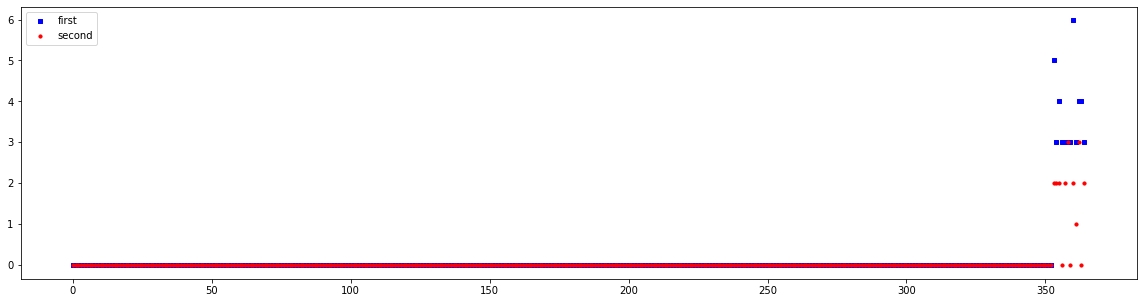

In [212]:
plot_2vec(22,81)

In [111]:
vec_angles = np.nan_to_num(vec_angles, posinf=0)

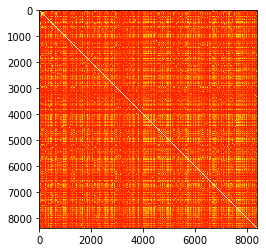

In [112]:
plt.imshow(vec_angles, cmap='hot', interpolation='nearest')
plt.show()

In [131]:
for x in range(vec_angles.shape[0]):
    vec_angles[x,x] = 1.0

In [133]:
dist_mat = 1-vec_angles

In [135]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))

In [136]:
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [139]:
N = vec_angles.shape[0]

Method:	 ward


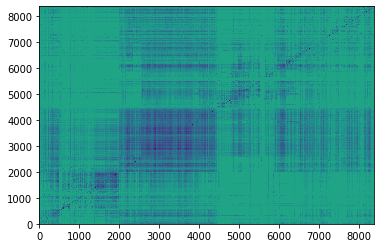

In [145]:
method = "ward"

print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Method:	 average


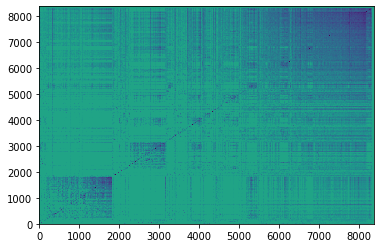

In [149]:
method = "average"

print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Method:	 complete


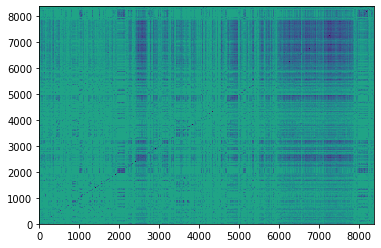

In [148]:
method = "complete"

print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [162]:
D = np.zeros((ordered_dist_mat.shape[0],ordered_dist_mat.shape[0]))
for x in range(ordered_dist_mat.shape[0]):
    D[x,x] = np.sum(ordered_dist_mat[x])

In [165]:
L = D-ordered_dist_mat

In [166]:
# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

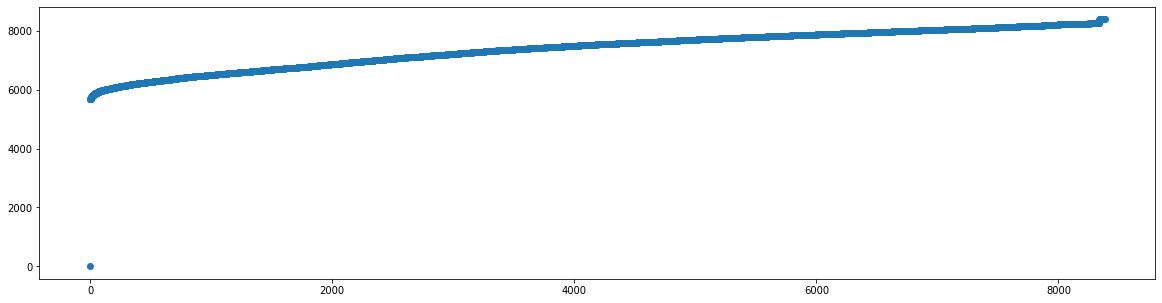

In [180]:
x = np.array(range(8382))
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
ax1.scatter(x,vals)
plt.show()

In [264]:
from sklearn.cluster import KMeans
n_clusters = 8
init = np.transpose(vecs[:,:n_clusters])
kmeans = KMeans(n_clusters=n_clusters, init=init)
kmeans.fit(ordered_dist_mat)
colors = kmeans.labels_

/Users/hsureggie/coding/python/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [265]:
new_map = []
rand_colors = np.random.rand(20,3)
count = 0
for x in range(ordered_dist_mat.shape[0]):
#     count += 1
#     if count == 2:
#         break
    group_color = rand_colors[colors[x]]
    group_color = np.repeat(group_color, ordered_dist_mat.shape[1]).reshape((3,ordered_dist_mat.shape[1])).T
    temp = np.reshape(ordered_dist_mat[x],(ordered_dist_mat[x].shape[0], 1))
    group_color = np.concatenate((group_color, temp), axis=1)
    new_map.append(group_color)
    

In [266]:
new_map = np.array(new_map)
print(new_map.shape)

(8382, 8382, 4)


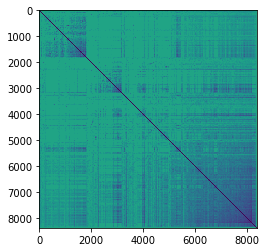

In [262]:
plt.imshow(ordered_dist_mat)
plt.show()

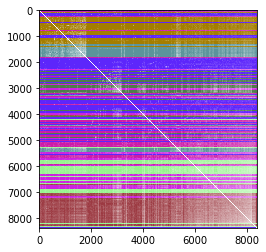

In [267]:
plt.imshow(new_map)
plt.show()

In [155]:
for x in res_order[2500:3000]:
    print(x, row2merch[x])

3911 黃金酷辣雞腿排
5606 輕鬆生活蕃茄肉醬義大利麵
5581 桂冠起司海鮮飯
3436 親子丼
2475 純萃喝濃厚系醇乳奶茶
6049 三矢蘇打
4948 夏日蜜蘋果酒
1151 黑松ＦＩＮ水漾輕補給
4294 上品綠茶
4373 伊藤園茉莉綠茶
278 宮廷花雕雞鍋
6832 銀次郎風味魚豚拉麵
7161 巧克力蛋糕棒
8291 三得利頂級黑啤酒
697 金芒果牛奶
4417 特調咖啡
7579 冰鎮桃子紅茶
7149 濃黑巧克力杯子蛋糕
6694 厚蛋鮪魚飯糰
4889 寶馬薄荷晶球香菸９號
3593 藥膳羊肉爐
2053 吉比花生麻糬麵包
929 冰鎮桃子紅茶
1570 麒麟啤酒６入裝
34 三米治－紐奧良烤雞
342 鮮切培根
7217 義美火鍋料綜合包
7251 桂冠蝦餃
7226 桂冠魚餃
7235 桂冠蛋餃
7261 台糖白玉五花肉片
935 經典紅茶
1587 詩莊堡蘋果酒－接骨木花
3326 調情聖手聖誕限定綜合莓果氣泡
7063 北海道黃金麵包
6128 天然熔岩氣泡水－檸檬
2564 茶裏王濃韻日式綠茶
3327 調情聖手聖誕限定綜合葡桃氣泡
3541 老欉柳丁２入（冷藏原果－袋）
7247 總匯披薩
5248 雪白菇
5285 雞肉野菜豆乳鍋
3828 巧克力蛋糕棒
6845 經典肉醬義大利麵
4051 地中海優酪乳無花果葡萄
4052 地中海優酪乳低脂原味
5750 芭樂汁飲料
234 鴻喜菇
736 多多活菌發酵乳原味ＬＩＧＨＴ
4129 １００％綜合果汁（含花青素）
5753 柳橙汁飲料
1647 微醉白色沙瓦哈蜜瓜口味
4508 菠啾野草水
1123 兔丸造型抱枕－虎丸款
1125 兔丸多功能萬用枕－懶懶丸款
805 津津蘆筍汁
6094 紅牛無糖能量飲料
7455 波蜜芭樂汁
5583 蒜香綜合滷味
2308 地中海優酪乳無花果葡萄
7821 菠啾野草水
6588 維士比啤酒（威士忌風味）
375 自然零蔓越莓優酪
3695 原味波士頓派
5119 老薑麻油雞肉燴飯
2530 御茶園冰釀紅茶９７５ｍｌ
7852 天然熔岩氣泡水－檸檬
2183 日式小火鍋
2667 三矢蘇打廣島蜜柑
2703 愛健黑豆水
5971 健康蕎麥茶
433 好運旺旺麵包
2054 好運旺旺麵包
2740 紅牛蔓越莓風味能量飲料
3212 （舊）

In [31]:
np.where(np.isnan(vec_angles))

(array([], dtype=int64), array([], dtype=int64))

In [35]:
import itertools
ii = itertools.count(vec_angles.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]

[{'node_id': 8382, 'left': 4425, 'right': 6083},
 {'node_id': 8383, 'left': 2240, 'right': 2721},
 {'node_id': 8384, 'left': 1535, 'right': 3873},
 {'node_id': 8385, 'left': 3302, 'right': 3559},
 {'node_id': 8386, 'left': 3313, 'right': 4284},
 {'node_id': 8387, 'left': 1579, 'right': 5771},
 {'node_id': 8388, 'left': 3907, 'right': 4620},
 {'node_id': 8389, 'left': 1097, 'right': 5989},
 {'node_id': 8390, 'left': 4553, 'right': 8162},
 {'node_id': 8391, 'left': 2723, 'right': 4742},
 {'node_id': 8392, 'left': 2504, 'right': 4489},
 {'node_id': 8393, 'left': 2715, 'right': 2720},
 {'node_id': 8394, 'left': 2713, 'right': 6239},
 {'node_id': 8395, 'left': 2724, 'right': 4524},
 {'node_id': 8396, 'left': 1143, 'right': 1664},
 {'node_id': 8397, 'left': 1237, 'right': 1980},
 {'node_id': 8398, 'left': 5987, 'right': 7270},
 {'node_id': 8399, 'left': 3332, 'right': 7970},
 {'node_id': 8400, 'left': 5973, 'right': 8149},
 {'node_id': 8401, 'left': 2663, 'right': 7288},
 {'node_id': 8402, '